In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import json 
import os
import imp
import networkx as nx
from collections import Counter
import itertools as it
import seaborn as sns
# sns.set()
sns.set_style("white")
sns.set_style("ticks") 
%load_ext autoreload

import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
import pickle
import glob
dfsl=[]
# filedir="/home/mosesboudourides/Dropbox/GradRes/DiplwmatikiGP/dataframes"
filedir="/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes"
dffs_files=['/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df2_2_1',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df3_2_1',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df4_2_1',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df5_2_1',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_1',
'/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_1']
# glob.glob(os.path.join(filedir,'*'))
    
print dffs_files
dfs = []
for filna in dffs_files:
    with (open(filna, "rb")) as openfile:
        while True:
            try:
                dfs.append(pickle.load(openfile))
            except EOFError:
                break

['/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df2_2_1', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df3_2_1', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df4_2_1', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df5_2_1', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df6_2_1', '/home/dell/Dropbox/GradRes/DiplwmatikiGP/dataframes/df7_2_1']


In [3]:
print dfs[0].head(1)
print dfs[1].head(1)
print dfs[2].head(1)
print dfs[3].head(1)
print dfs[4].head(1)
print dfs[5].head(1)


  Cut Hashtag Graph   Density  Density in terms of Weight  cut-off values
0               G_1  0.000846                8.330056e-08               1
  Cut Hashtag Graph     Slope  Logarithmic Slope  cut-off values
0               G_1 -0.029091        -123.152986               1
  cut hashtag graph  degree centralization  betweenness centralization  \
0               G_1            7253.062158                 7380.309439   

   closeness centralization  katz centralization  eigenvector centralization  \
0               3752.269176          1832.478544                  6094.31707   

   pagerank centralization  cut-off values  
0               1702.25509               1  
  cut hashtag graph  degree assortativity coefficient  cut-off values
0               G_1                         -0.145156               1
  cut hashtag graph  number of connected components  cut-off values
0               G_1                             188               1
  Cut Hashtag Graph  Number of Communities  Mo

In [4]:
mydf=dfs[0].join(dfs[1][['Logarithmic Slope','Slope']])
mydf=mydf.join(dfs[2][['degree centralization','betweenness centralization','closeness centralization',
                       'katz centralization','eigenvector centralization','pagerank centralization']])
mydf=mydf.join(dfs[3][['degree assortativity coefficient']])
mydf=mydf.join(dfs[4][['number of connected components']])
mydf=mydf.join(dfs[5][['Number of Communities','Modularity Coefficient']])
mydf=mydf.sort(['cut-off values'], ascending=[True])
mydf=mydf[['Cut Hashtag Graph','cut-off values','Density','Density in terms of Weight',
          'Logarithmic Slope','Slope','degree centralization','betweenness centralization',
          'closeness centralization','katz centralization','eigenvector centralization','pagerank centralization',
          'degree assortativity coefficient','number of connected components','Number of Communities',
           'Modularity Coefficient']]
mydf

,Cut Hashtag Graph,cut-off values,Density,Density in terms of Weight,Logarithmic Slope,Slope,degree centralization,betweenness centralization,closeness centralization,katz centralization,eigenvector centralization,pagerank centralization,degree assortativity coefficient,number of connected components,Number of Communities,Modularity Coefficient
0,G_1,1,0.000846,8.330056e-08,-123.152986,-0.029091,7253.062158,7380.309439,3752.269176,1832.478544,6094.317070,1702.255090,-0.145156,188,333.0,0.344744
1,G_2,2,0.004008,7.326110e-07,-40.782017,-0.043213,2580.488153,2320.084249,1311.108816,486.325435,2051.835620,589.271230,-0.141828,53,109.0,0.300714
2,G_3,3,0.008093,1.944398e-06,-23.632899,-0.048433,1616.551031,1303.382519,827.881073,268.267585,1256.857447,369.535419,-0.158222,36,72.0,0.284434
3,G_4,4,0.012339,3.567105e-06,-16.812209,-0.050821,1204.636819,896.980758,618.738734,257.046575,926.107643,278.878154,-0.174537,25,51.0,0.277737
4,G_5,5,0.017876,5.925705e-06,-12.241003,-0.049666,960.526316,662.820677,489.430599,167.734486,717.298510,223.385212,-0.191033,13,38.0,0.267627
5,G_6,6,0.023536,8.812173e-06,-9.449236,-0.049170,803.003378,530.082272,408.100196,168.105144,587.068537,187.751702,-0.198757,7,28.0,0.257661
6,G_7,7,0.028895,1.202817e-05,-7.821174,-0.049588,682.936842,426.438408,348.013508,152.182426,501.737503,162.614618,-0.208394,6,26.0,0.247732
7,G_8,8,0.033513,1.524570e-05,-7.035433,-0.048775,608.278519,365.132271,311.125440,125.397859,445.040285,145.908206,-0.215609,6,24.0,0.253391
8,G_9,9,0.038647,1.891196e-05,-6.073589,-0.048151,545.478548,313.361482,279.287661,122.251335,398.986144,132.440515,-0.223764,5,21.0,0.247652
9,G_10,10,0.044011,2.287215e-05,-5.393612,-0.047513,489.637024,264.500884,251.473256,113.838526,362.324351,120.506704,-0.228443,5,22.0,0.241310


In [ ]:
mydf.columns=['Cut Hashtag Graph','Cut-off Values','Density','Density in terms of Weight',
              'Logarithmic Slope of Histograms',
              'Slope of Histograms',
              'Degree Centralization','Betweenness Centralization','Closeness Centralization',
              'Katz Centralization','Eigenvector Centralization',
              'Pagerank Centralization','Degree Assortativity Coefficient','Number of Connected Components',
              'Number of Communities','Modularity Coefficient']
mydf

,Cut Hashtag Graph,Cut-off Values,Density,Density in terms of Weight,Logarithmic Slope of Histograms,Slope of Histograms,Degree Centralization,Betweenness Centralization,Closeness Centralization,Katz Centralization,Eigenvector Centralization,Pagerank Centralization,Degree Assortativity Coefficient,Number of Connected Components,Number of Communities,Modularity Coefficient
0,G_1,1,0.000846,8.330056e-08,-123.152986,-0.029091,7253.062158,7380.309439,3752.269176,1832.478544,6094.317070,1702.255090,-0.145156,188,333.0,0.344744
1,G_2,2,0.004008,7.326110e-07,-40.782017,-0.043213,2580.488153,2320.084249,1311.108816,486.325435,2051.835620,589.271230,-0.141828,53,109.0,0.300714
2,G_3,3,0.008093,1.944398e-06,-23.632899,-0.048433,1616.551031,1303.382519,827.881073,268.267585,1256.857447,369.535419,-0.158222,36,72.0,0.284434
3,G_4,4,0.012339,3.567105e-06,-16.812209,-0.050821,1204.636819,896.980758,618.738734,257.046575,926.107643,278.878154,-0.174537,25,51.0,0.277737
4,G_5,5,0.017876,5.925705e-06,-12.241003,-0.049666,960.526316,662.820677,489.430599,167.734486,717.298510,223.385212,-0.191033,13,38.0,0.267627
5,G_6,6,0.023536,8.812173e-06,-9.449236,-0.049170,803.003378,530.082272,408.100196,168.105144,587.068537,187.751702,-0.198757,7,28.0,0.257661
6,G_7,7,0.028895,1.202817e-05,-7.821174,-0.049588,682.936842,426.438408,348.013508,152.182426,501.737503,162.614618,-0.208394,6,26.0,0.247732
7,G_8,8,0.033513,1.524570e-05,-7.035433,-0.048775,608.278519,365.132271,311.125440,125.397859,445.040285,145.908206,-0.215609,6,24.0,0.253391
8,G_9,9,0.038647,1.891196e-05,-6.073589,-0.048151,545.478548,313.361482,279.287661,122.251335,398.986144,132.440515,-0.223764,5,21.0,0.247652
9,G_10,10,0.044011,2.287215e-05,-5.393612,-0.047513,489.637024,264.500884,251.473256,113.838526,362.324351,120.506704,-0.228443,5,22.0,0.241310


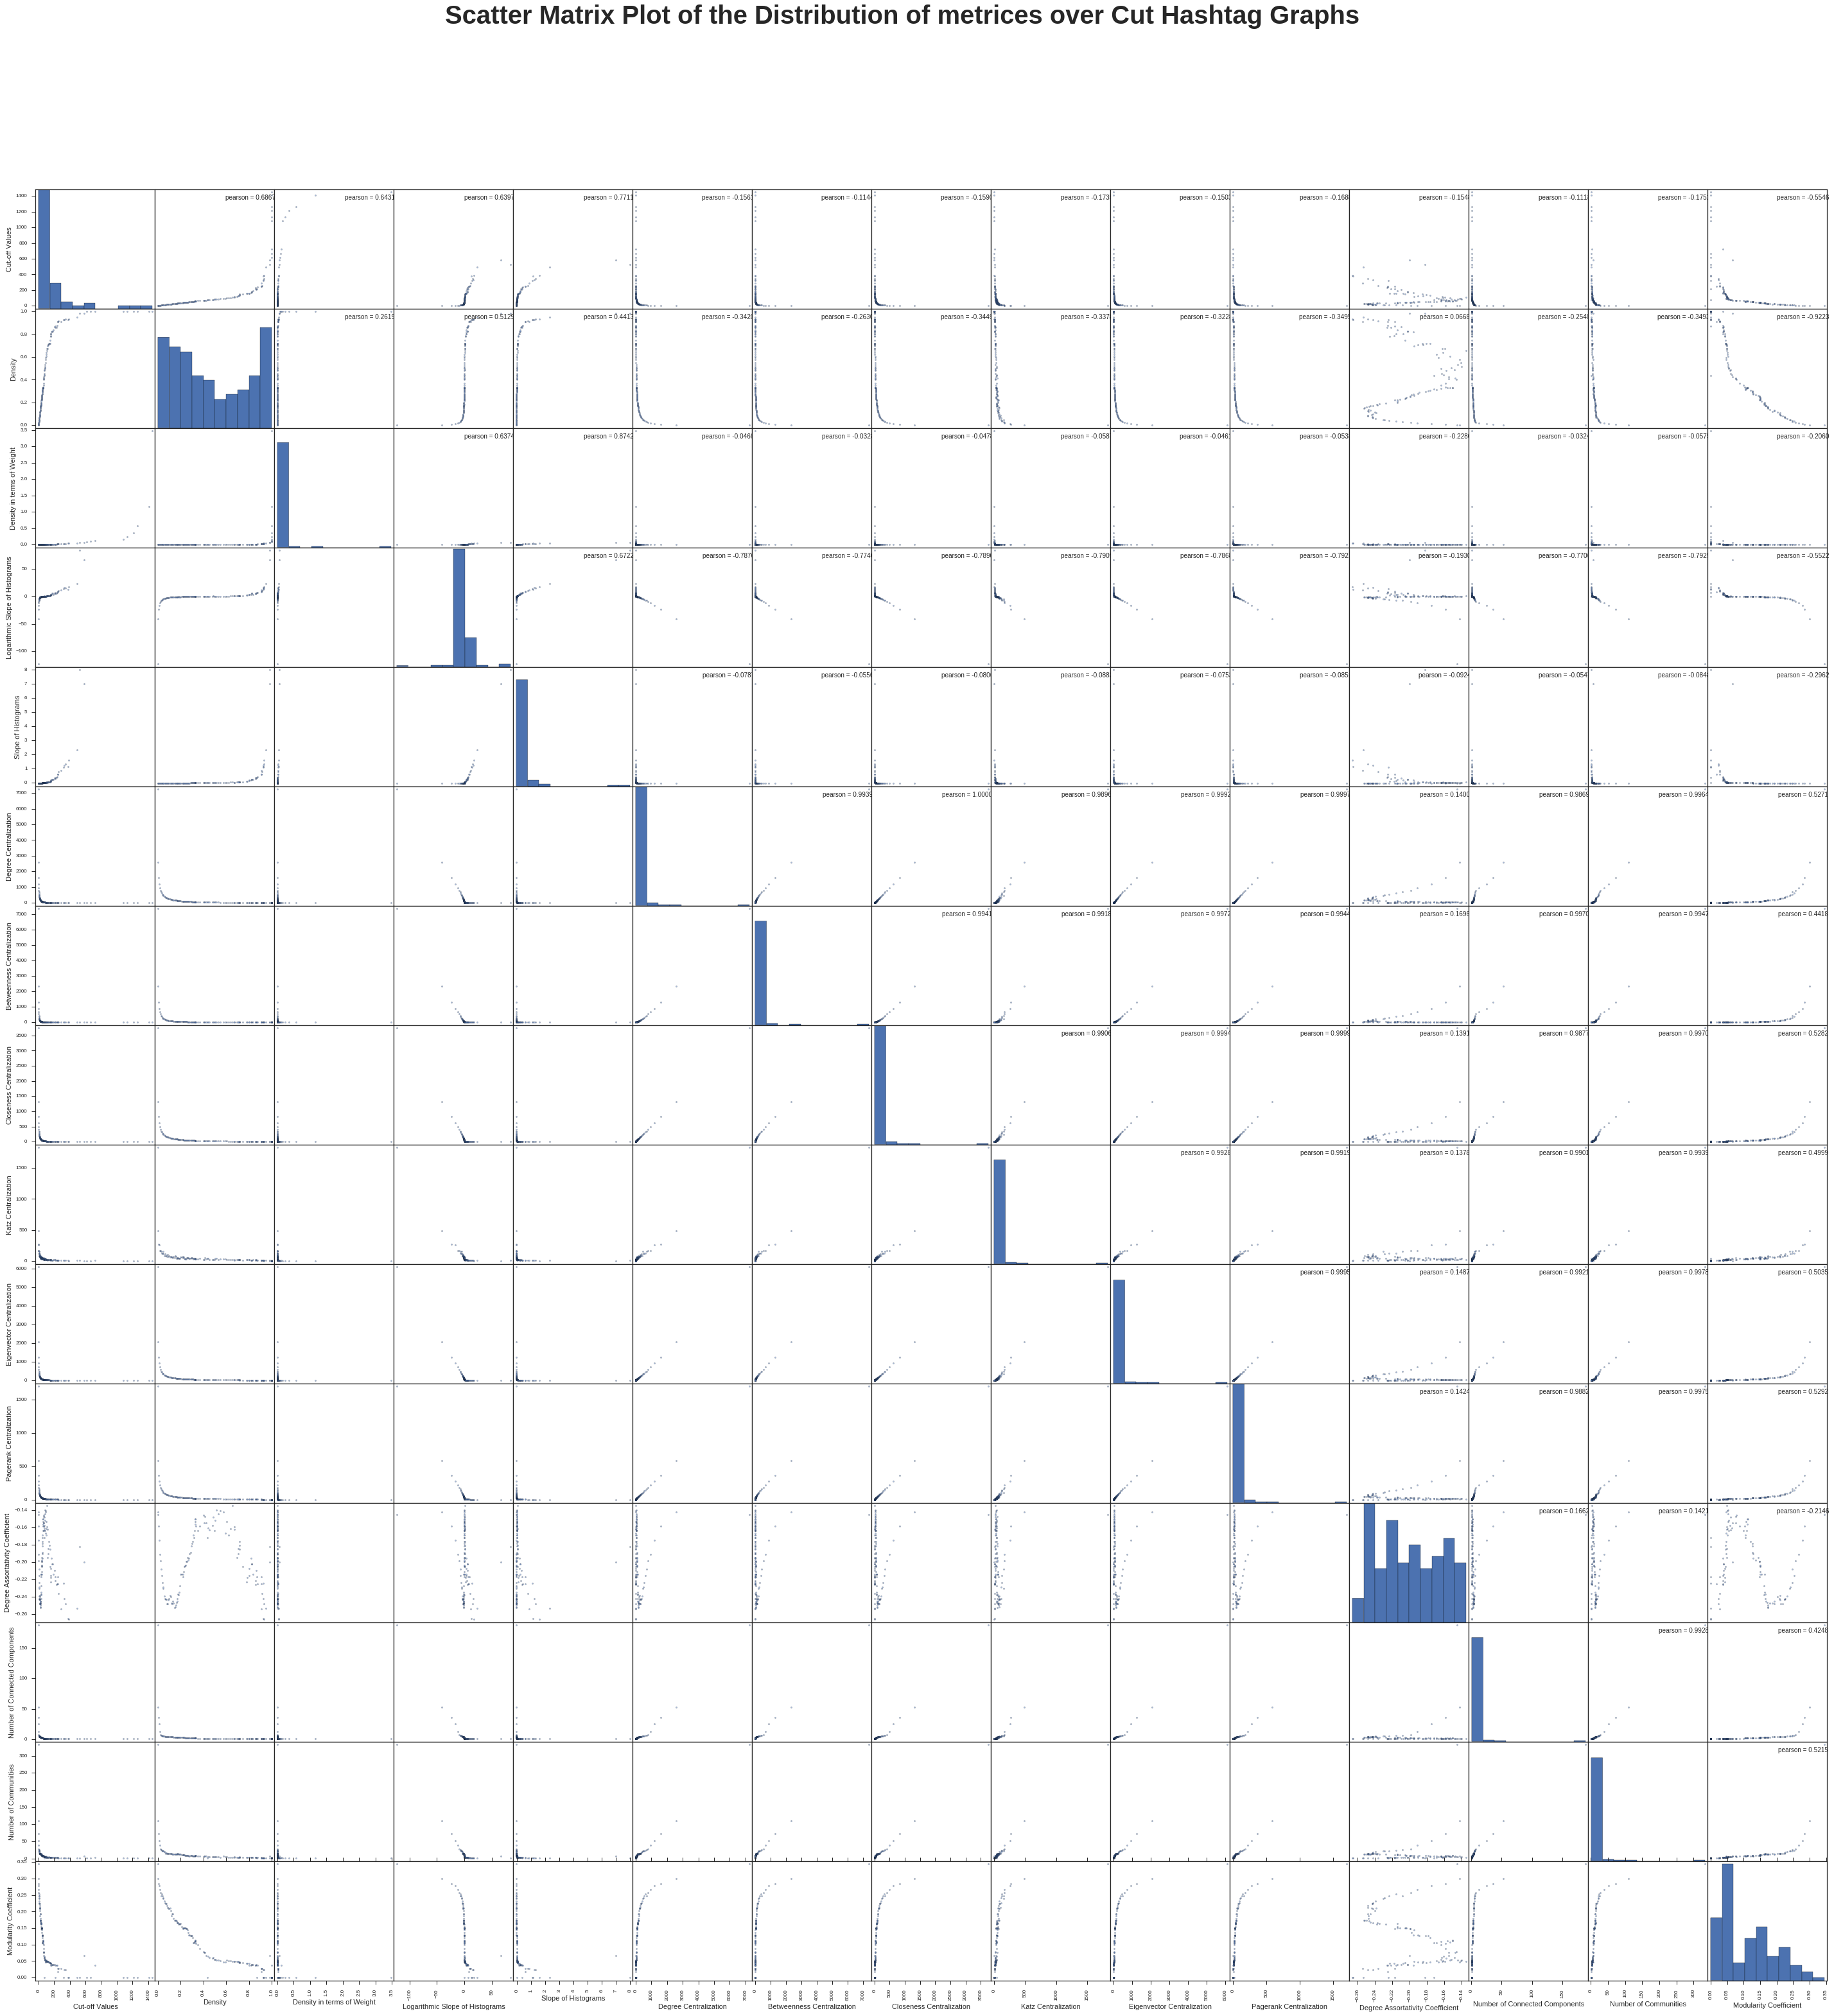

In [ ]:
import warnings
warnings.filterwarnings("ignore")
ntei='Scatter Matrix Plot of the Distribution of metrices over Cut Hashtag Graphs' 
f, ax = plt.subplots(figsize=(50,50))
sss=scatter_matrix(mydf[['Cut Hashtag Graph','Cut-off Values','Density','Density in terms of Weight',
              'Logarithmic Slope of Histograms',
              'Slope of Histograms',
              'Degree Centralization','Betweenness Centralization','Closeness Centralization',
              'Katz Centralization','Eigenvector Centralization',
              'Pagerank Centralization','Degree Assortativity Coefficient','Number of Connected Components',
              'Number of Communities','Modularity Coefficient']], alpha=0.5, color='black', diagonal='hist',ax=ax)
plt.suptitle(ntei,fontsize=40,fontweight='bold')
corr = mydf.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(sss, k=1)):
    sss[i, j].annotate("pearson = %.4f" %corr[i,j], (0.8, 0.93), xycoords='axes fraction', ha='center', va='center')
# f.tight_layout()